## Capstone Project: 
## Predicting Player's Transfer Values and Building a Transfer Recommendation System

## Problem Statement

I am the sporting director of General Assembly Football Club (GAFC). My main role is to recruit players which suits the profile of my football club to strengthen the current squad so as to achieve better results going forward.

The transfer market have been very busy all the time, with many players changing clubs constantly. There are many possible reasons for a player to seek a transfer elsewhere; more game time, playing for a more reputable club/league, higher wages etc. It is pretty common for players to play for as many as 6 clubs during their playing career compared the past whereby players usually stick to about 3 clubs throughout their career.

In the midst of these transfer frenzy between clubs and players, certain problems arises. Firstly, players' transfer fees are greatly inflated these days as clubs get richer mainly due to  (1) massive injection in capital from recent high profile takeovers by rich businesssmen, and (2) increased broadcasting revenue. Back then, a 35 million transfer fee would be deemed as a marquee signing. However, in recent times, a transfer of that value would be deemed as a normality as the top players in game are worth easily over 70 million.

In addition, many clubs tend to make impulse purchases, leading to many transfer being deemed as flops. It is important to consider the various characteristics and traits of a player and assess his suitability before making purchasing. Many clubs overlooked that and there is new pattern of buying players that are more well known and hyped up by the media. This leads to severe consequences as many clubs end up paying a hugely inflated transfer fee for a players that does not suit the clubs' needs. More often than not, the new purchase will most likely have a disappointing season and be deemed as a flop or failed transfer. As such, it deals a huge blow to the financials of football clubs especially the smaller ones which do not have much budget to spare with regards to transfers.

Therefore, this project aims to resolve the issues above by:

(1) Creating a regression model which correctly predicts a player's transfer value based on various features.

(2) Building a recommender system to filter out players which we can share with our scouting department to aid them in finding the right players for the club at the right price.  (eg. we need a clinical striker, with fantastic finishing and speed, preferably ard the range of 30-50 million)


The target audience for this project involves anyone associated with talent recruitment and scouting for footballers.

### Imports

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

pd.set_option('max_rows',None)
%matplotlib inline
sns.set()

In [2]:
#import tensorflow as tf

In [3]:
df = pd.read_csv('../data/fifa19.csv')

In [4]:
df.dtypes

Unnamed: 0                    int64
ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                      

In [5]:
df.shape

(18207, 89)

In [6]:
df.head(30)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [7]:
df.drop(['Unnamed: 0', 'Photo', 'Flag', 'Club Logo', 'Special', 'Real Face'], axis=1, inplace=True)

In [8]:
#df.isnull().sum().sort_values(ascending=False)

In [9]:
#len(df.Club.unique())
#len(df.Nationality.unique())

In [10]:
df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


## Data Cleaning

In [11]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKR

In [12]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                           object
ST                           object
RS                           object
LW                           object
LF                           object
CF                          

In [13]:
for col in ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                    'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
                    'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                    'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
                     'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']:
    df[col] = df[col].astype('object')

In [14]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW                           2085
LF                           2085
CF                           2085
RF                           2085
RW            

### Checking for Missing Values

In [15]:
df.isnull().sum().sort_values(ascending=False)
#df.isnull().any().sort_values(ascending=False).head(40)

Loaned From                 16943
RDM                          2085
LM                           2085
CB                           2085
LCB                          2085
LB                           2085
RWB                          2085
CDM                          2085
LDM                          2085
LWB                          2085
RM                           2085
RCM                          2085
CM                           2085
LCM                          2085
RAM                          2085
RB                           2085
CAM                          2085
LAM                          2085
RW                           2085
RF                           2085
CF                           2085
LF                           2085
LW                           2085
RS                           2085
ST                           2085
LS                           2085
RCB                          2085
Release Clause               1564
Joined                       1553
Contract Valid

### Dropping Redundant Columns

Firstly, i will drop all the individual position data as i will be classifying them into more distinct positions later on.

In [16]:
df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

I will also proceed to drop the other redundant columns.

In [17]:
df.drop(['Loaned From', 'Release Clause', 'Joined', 'Jersey Number'], axis=1, inplace=True)


### Imputing Missing Values

In [18]:
df.isnull().sum().sort_values(ascending=False)

Contract Valid Until        289
Club                        241
Position                     60
GKReflexes                   48
Crossing                     48
LongPassing                  48
GKPositioning                48
Curve                        48
Dribbling                    48
Volleys                      48
ShortPassing                 48
HeadingAccuracy              48
Finishing                    48
Height                       48
Weight                       48
Acceleration                 48
Body Type                    48
Work Rate                    48
Skill Moves                  48
Weak Foot                    48
International Reputation     48
Preferred Foot               48
BallControl                  48
FKAccuracy                   48
SprintSpeed                  48
Positioning                  48
GKKicking                    48
GKHandling                   48
GKDiving                     48
SlidingTackle                48
StandingTackle               48
Marking 

#### Remaining Contract Validity
There are 289 missing values for the remaining contract validity column. A typical footballer contracts is generally around 4-5 years for long term contracts and 1-2 years for short term contracts. As such, i will imput the missing values with the median year 2020, which means there is 1 year left in the contract

In [19]:
df['Contract Valid Until'].value_counts().head()

2019    4819
2021    4360
2020    4027
2022    1477
2023    1053
Name: Contract Valid Until, dtype: int64

In [20]:
df['Contract Valid Until'].fillna(2020, inplace=True)

#### Free Agents
There are 241 players in the dataset which have missing values. They are most likely to be free agents. I will impute them with the term 'Free Agent'.

In [21]:
df['Club'].fillna('Free Agent', inplace=True)

#### Positions
For the players without a position, i will fill them with the position with the most counts which is striker (ST). Everybody loves to score goals don't they!

In [22]:
df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [23]:
df['Position'].value_counts().head()

ST    2152
GK    2025
CB    1778
CM    1394
LB    1322
Name: Position, dtype: int64

In [24]:
df['Position'].fillna('ST', inplace=True)

#### Attributes


For attributes, i will impute the missing values with the mean of each variable.

In [25]:
for col in ['Acceleration', 'Curve', 'Agility', 'Vision', 'GKKicking', 'GKHandling', 'GKDiving', 'GKReflexes',
            'GKPositioning', 'SlidingTackle', 'StandingTackle', 'Marking', 'Reactions', 'Composure', 'Penalties',
            'Positioning', 'Interceptions', 'Aggression', 'LongShots', 'Strength', 'Stamina', 'Jumping', 'ShotPower',
            'Balance', 'Finishing', 'BallControl', 'LongPassing', 'FKAccuracy', 'Dribbling', 'Volleys', 'ShortPassing',
           'HeadingAccuracy', 'Crossing', 'SprintSpeed']:
    df[col] = df[col].fillna((df[col].mean()))

#### Other Missing Values
For the rest of the missing values, i will manually impute appropriate values based on the variable.

In [26]:
df.isnull().sum().sort_values(ascending=False).head(10)

Skill Moves                 48
Body Type                   48
Weight                      48
Height                      48
Preferred Foot              48
International Reputation    48
Weak Foot                   48
Work Rate                   48
Volleys                      0
ShortPassing                 0
dtype: int64

In [27]:
#df.dtypes

#### Work Rate

In [28]:
# Work Rate
df['Work Rate'].value_counts().head()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
Name: Work Rate, dtype: int64

In [29]:
df['Work Rate'].fillna('Medium/ Medium', inplace=True)

#### Body Type

In [30]:
df['Body Type'].value_counts().head(10)

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
C. Ronaldo                 1
Akinfenwa                  1
Courtois                   1
Neymar                     1
Name: Body Type, dtype: int64

In [31]:
df['Body Type'].replace('Messi', 'Lean', inplace = True)
df['Body Type'].replace('C. Ronaldo', 'Stocky', inplace = True)
df['Body Type'].replace('Courtois', 'Stocky', inplace = True)
df['Body Type'].replace('PLAYER_BODY_TYPE_25', 'Normal', inplace = True)
df['Body Type'].replace('Shaqiri', 'Stocky', inplace = True)
df['Body Type'].replace('Neymar', 'Lean', inplace = True)
df['Body Type'].replace('Akinfenwa', 'Stocky',inplace = True)
df['Body Type'].fillna('Normal', inplace=True)

In [32]:
df['Body Type'].value_counts().head()

Normal    10644
Lean       6419
Stocky     1144
Name: Body Type, dtype: int64

#### Preferred Foot

In [33]:
df['Preferred Foot'].value_counts().head()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [34]:
df['Preferred Foot'].fillna('Right', inplace=True)

#### Height and Weight

In [35]:
df['Height'].value_counts().head()

6'0     2881
5'10    2479
5'9     2238
5'11    2159
6'2     2015
Name: Height, dtype: int64

In [36]:
df['Weight'].value_counts().head()

165lbs    1483
154lbs    1439
176lbs    1041
172lbs     987
159lbs     946
Name: Weight, dtype: int64

In [37]:
df['Height'].fillna('5\'9', inplace=True)
df['Weight'].fillna('154lbs', inplace=True)

#### International Reputation, Weak Foot and Skill Moves

In [38]:
df['International Reputation'].fillna(2, inplace=True)
df['Weak Foot'].fillna(2, inplace=True)
df['Skill Moves'].fillna(2, inplace=True)

In [39]:
# Referenced from Nitin Datta
def value_converter(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_converter)
df['Wage'] = df['Wage'].apply(value_converter)

In [40]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,158023,20801,190871,193080,192985,183277,177003,176580,155862,200389
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne,E. Hazard,L. Modrić,L. Suárez,Sergio Ramos,J. Oblak
Age,31,33,26,27,27,27,32,31,32,25
Nationality,Argentina,Portugal,Brazil,Spain,Belgium,Belgium,Croatia,Uruguay,Spain,Slovenia
Overall,94,94,92,91,91,91,91,91,91,90
Potential,94,94,93,93,92,91,91,91,91,93
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City,Chelsea,Real Madrid,FC Barcelona,Real Madrid,Atlético Madrid
Value,1.105e+08,7.7e+07,1.185e+08,7.2e+07,1.02e+08,9.3e+07,6.7e+07,8e+07,5.1e+07,6.8e+07
Wage,565000,405000,290000,260000,355000,340000,420000,455000,380000,94000
Preferred Foot,Left,Right,Right,Right,Right,Right,Right,Right,Right,Right


In [41]:
#df.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

## EDA

### Distribution

### Age

The mean age of a player is: 25.122205745043114
The oldest age is a player is: 45 He is O. Pérez from Pachuca
The youngest age is a player is: 16 He is W. Geubbels from AS Monaco


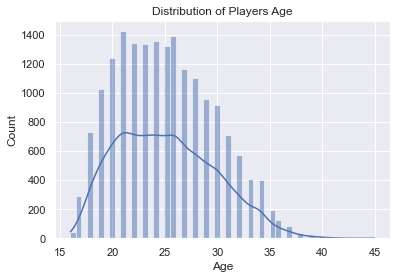

In [42]:
sns.histplot(df, x="Age", kde=True).set_title('Distribution of Players Age')

print("The mean age of a player is:", df.Age.mean())
print("The oldest age is a player is:", df.Age.max(), "He is", df.loc[df['Age'].idxmax()]['Name'], "from", df.loc[df['Age'].idxmax()]['Club'])
print("The youngest age is a player is:", df.Age.min(), "He is", df.loc[df['Age'].idxmin()]['Name'], "from", df.loc[df['Age'].idxmin()]['Club'])

### Overall

The mean overall rating of a player is: 66.23869940132916
The highest overall rating is a player is: 94 He is L. Messi from FC Barcelona
The lowest overall rating is a player is: 46 He is G. Nugent from Tranmere Rovers


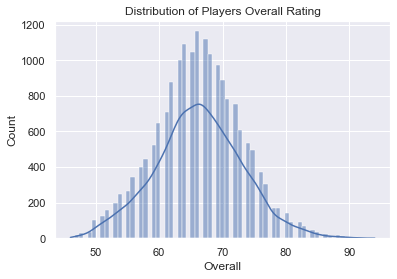

In [43]:
sns.histplot(df, x="Overall", kde=True).set_title('Distribution of Players Overall Rating')

print("The mean overall rating of a player is:", df.Overall.mean()) 
print("The highest overall rating is a player is:", df.Overall.max(), "He is", df.loc[df['Overall'].idxmax()]['Name'], "from", df.loc[df['Overall'].idxmax()]['Club'])
print("The lowest overall rating is a player is:", df.Overall.min(), "He is", df.loc[df['Overall'].idxmin()]['Name'], "from", df.loc[df['Overall'].idxmin()]['Club'])

### Potential

The mean potential rating of a player is: 71.30729939034437
The highest potential rating is a player is: 95 He is K. Mbappé from Paris Saint-Germain
The lowest potential rating is a player is: 48 He is Y. Uchimura from Hokkaido Consadole Sapporo


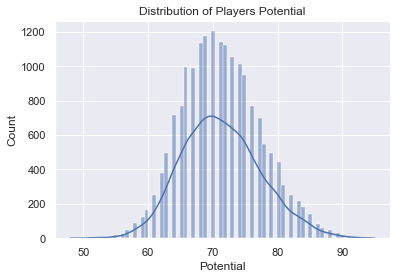

In [44]:
sns.histplot(df, x="Potential", kde=True).set_title('Distribution of Players Potential')

print("The mean potential rating of a player is:", df.Potential.mean()) 
print("The highest potential rating is a player is:", df.Potential.max(), "He is", df.loc[df['Potential'].idxmax()]['Name'], "from", df.loc[df['Potential'].idxmax()]['Club'])
print("The lowest potential rating is a player is:", df.Potential.min(), "He is", df.loc[df['Potential'].idxmin()]['Name'], "from", df.loc[df['Potential'].idxmin()]['Club'])

### Overall vs Age

Text(0.5, 1.0, 'Age vs Overall Rating')

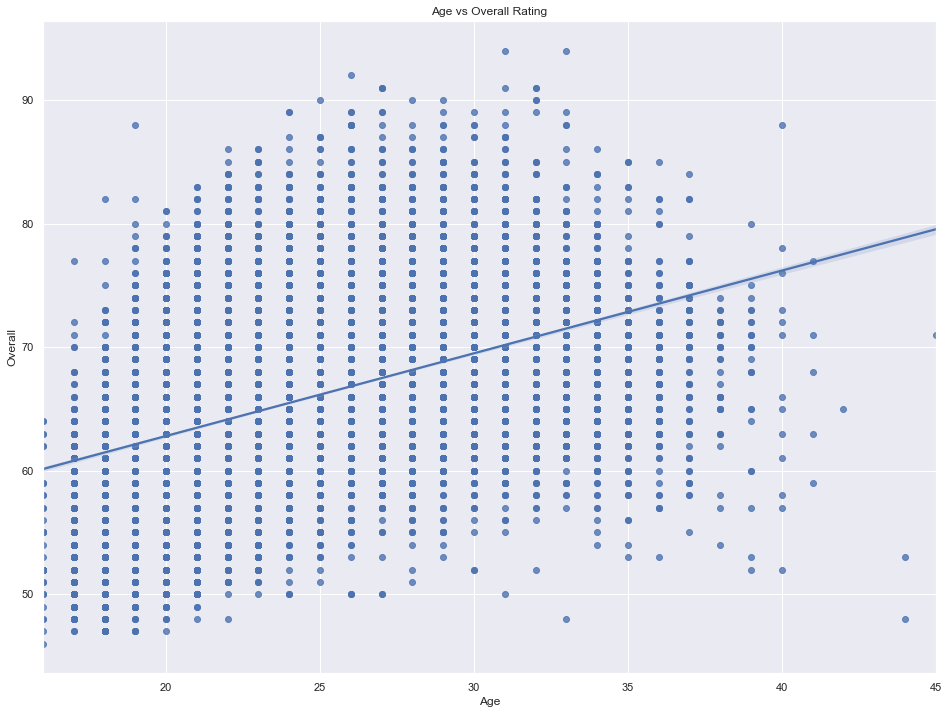

In [45]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(16, 12))
sns.regplot(x=df['Age'] , y=df['Overall']).set_title('Age vs Overall Rating')

As seen from the plot above, players gets better with age, as they play more games and gain more experience under their belt. Players peak at around 26-33 years old where their overall is the highest.

### Potential vs Age

Text(0.5, 1.0, 'Age vs Potential Rating')

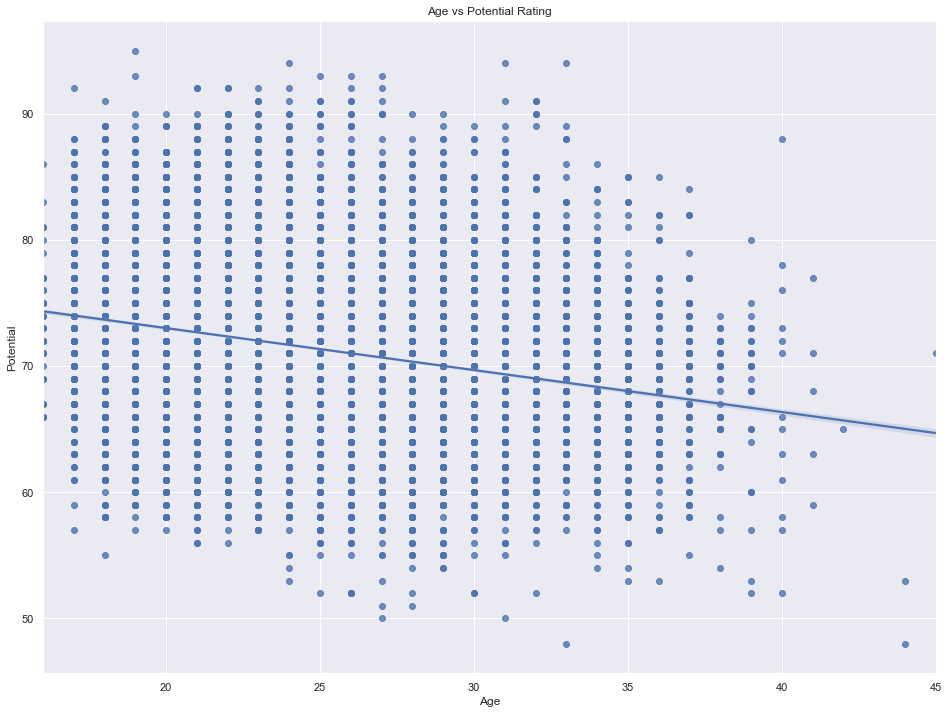

In [46]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(16, 12))
sns.regplot(x=df['Age'] , y=df['Potential']).set_title('Age vs Potential Rating')

As you grow older, your potential decreases. Player's potential are highest at around 21-27 years old.

In [47]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

### Sprint Speed vs Age

Text(0.5, 1.0, 'Age vs Sprint Speed')

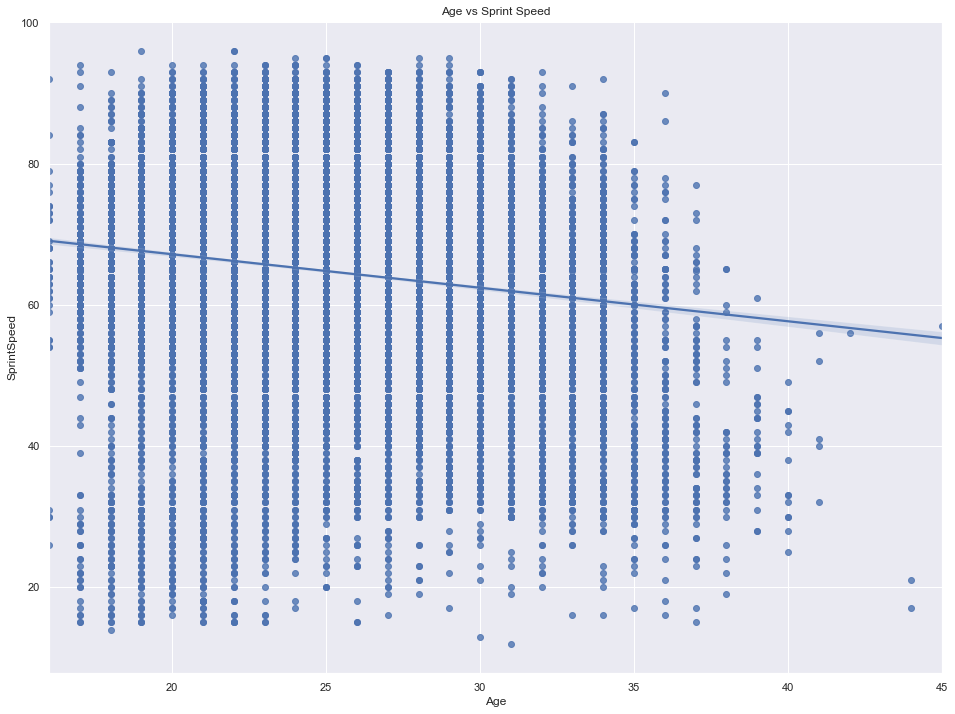

In [48]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(16, 12))
sns.regplot(x=df['Age'] , y=df['SprintSpeed']).set_title('Age vs Sprint Speed')

Text(0.5, 1.0, 'Age vs Acceleration')

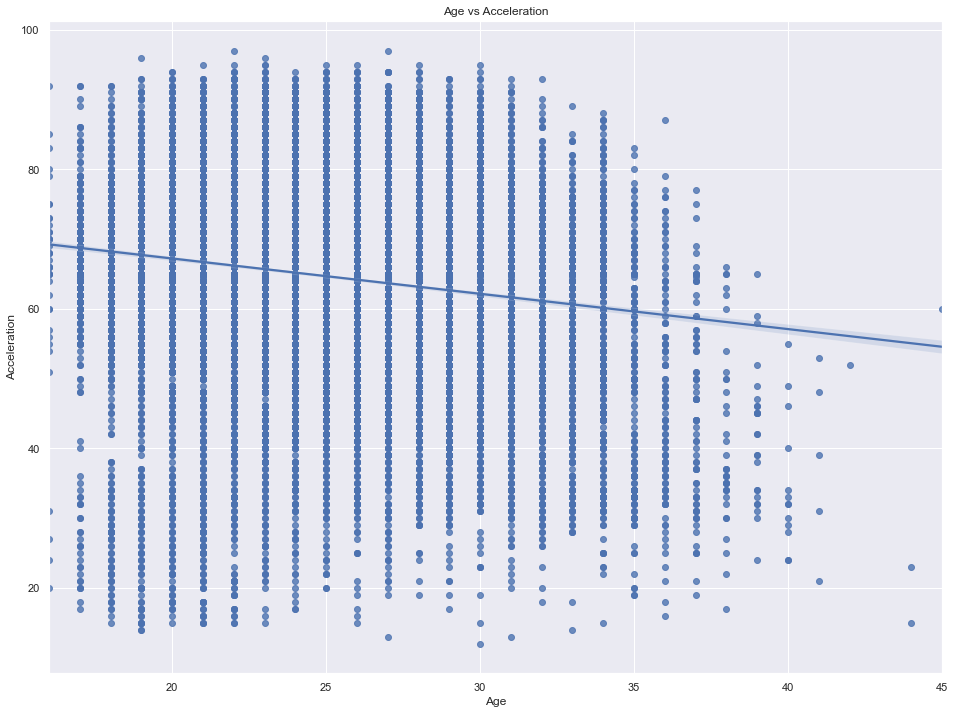

In [49]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(16, 12))
sns.regplot(x=df['Age'] , y=df['Acceleration']).set_title('Age vs Acceleration')

In [50]:
#sns.lineplot(data=df, x=df['SprintSpeed'], y=df['Acceleration'], hue=df['Age'])

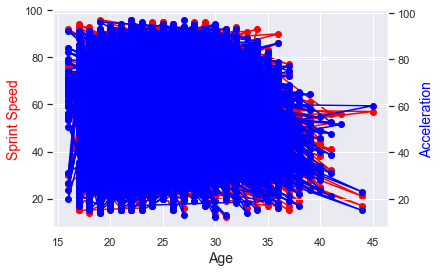

In [51]:
age = df.Age
sprintspeed = df.SprintSpeed 
acceleration = df.Acceleration
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(age, sprintspeed, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Age",fontsize=14)
# set y-axis label
ax.set_ylabel("Sprint Speed",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(age, acceleration,color="blue",marker="o")
ax2.set_ylabel("Acceleration",color="blue",fontsize=14)
plt.show()

In [52]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [53]:
agility = df[['SprintSpeed', 'Acceleration']]

As a player age, his sprint speed and acceleration decreases. Sprint speed and acceleration is also directly proportional too.

### Wage vs Age

Text(0.5, 1.0, 'Age vs Wage')

<Figure size 1152x864 with 0 Axes>

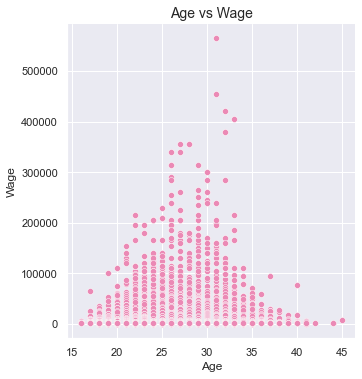

In [54]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(16, 12))
sns.relplot(x=df['Age'] , y=df['Wage'], color = '#EB89B5')
plt.title('Age vs Wage', fontsize=14)


From the plot, we can observe an upward trend as players age until about 31 years old after which it declines. Footballers and other sports athletes usually have a limited career length in the range of 10-15 years. Most of them peak at around 27 years old and retire at around 35 years old. As such, players earn the highest wage during their peak years from 27 years old to 31 years old. However, there are a few exceptional players that earn extremely high wages even after 30 years old. These are the best players in the game with very high overall and earnings.

### Preferred Foot

In [55]:
preferred_foot = df.groupby(['Preferred Foot']).size().reset_index(name='count')
preferred_foot

,Preferred Foot,count
0,Left,4211
1,Right,13996


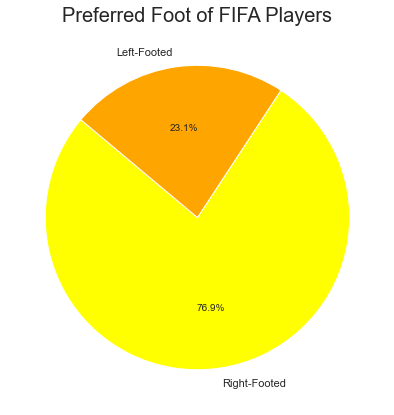

In [56]:
%matplotlib inline

plt.figure(figsize=(7,7))
labels = 'Right-Footed', 'Left-Footed'
pf = [13996, 4211]
colors = ['yellow', 'orange'] 
plt.pie(pf, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle=140)
plt.title('Preferred Foot of FIFA Players', fontsize=20)
plt.show()

There are 13996 right footed players and 4211 left footed players. There are more right footed players than left footed players naturally.

### Value

In [57]:
df_value = df.drop_duplicates(subset='Name', keep='first')

In [58]:
#df_value = df_value.groupby('Name').sum().sort_values('Value', ascending=False).head(30)
df_value = df_value.groupby('Name').sum().sort_values('Value', ascending=False).iloc[:30]

Text(0, 0.5, 'Player')

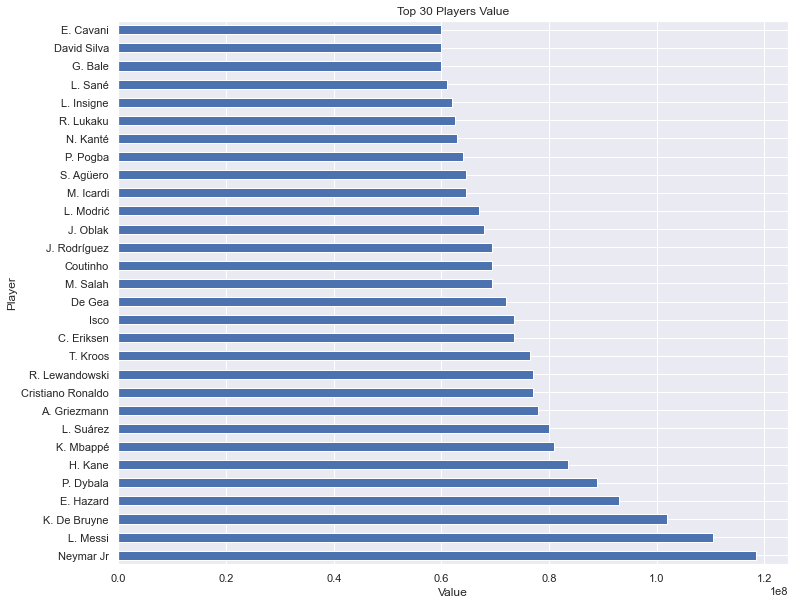

In [59]:
# Top 30 players value
df_value['Value'].plot(kind='barh', figsize=(12,10))
plt.title("Top 30 Players Value")
plt.xlabel("Value")
plt.ylabel("Player")

The mean value of a player is: $ 2410695.8861976163
The most expensive player is worth: $ 118500000.0 He is Neymar Jr from Paris Saint-Germain
The Cheapest player is worth: $ 0.0 He is L. Paredes from Free Agent


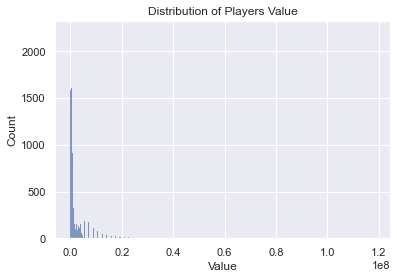

In [60]:
sns.histplot(data=df, x="Value").set_title('Distribution of Players Value')

print("The mean value of a player is: $", df.Value.mean())
print("The most expensive player is worth: $", df.Value.max(), "He is", df.loc[df['Value'].idxmax()]['Name'], "from", df.loc[df['Value'].idxmax()]['Club'])
print("The Cheapest player is worth: $", df.Value.min(), "He is", df.loc[df['Value'].idxmin()]['Name'], "from", df.loc[df['Value'].idxmin()]['Club'])

### Wages

In [61]:
df_wage = df.drop_duplicates(subset='Name', keep='first')

In [62]:
df_wage = df_wage.groupby('Name').sum().sort_values('Wage', ascending=False).iloc[:30]

The top earner has a wage of : $ 565000.0 He is L. Messi from FC Barcelona


Text(0, 0.5, 'Player')

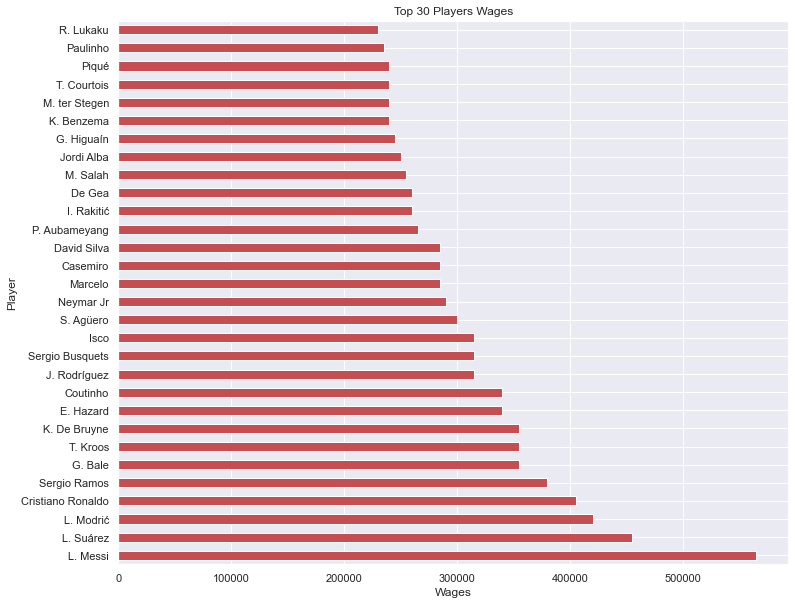

In [63]:
# Top 30 players wages
print("The top earner has a wage of : $", df.Wage.max(), "He is", df.loc[df['Wage'].idxmax()]['Name'], "from", df.loc[df['Wage'].idxmax()]['Club'])
df_wage['Wage'].plot(kind='barh', figsize=(12,10), color='r')
plt.title("Top 30 Players Wages")
plt.xlabel("Wages")
plt.ylabel("Player")

### Clubs & Countries

In [64]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))
print('--'*40)

countries = (df['Nationality'].value_counts().head(5))
print("The top 3 countries with the most number of players in FIFA 19 are:",
      countries.index[0], ",", countries.index[1], "and", countries.index[2])

Total number of countries : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64
--------------------------------------------------------------------------------
The top 3 countries with the most number of players in FIFA 19 are: England , Germany and Spain


In [65]:
num_clubs = len(df['Club'].unique())
print("There are", num_clubs ,"different football clubs in the game.")

There are 652 different football clubs in the game.


In [66]:
top20_clubs = df.groupby(['Club'], as_index=False)['Overall'].mean()
top20_clubs['Overall'] = round(top20_clubs['Overall'],2)
top20_clubs = top20_clubs.sort_values('Overall',ascending=False).head(20)

Text(0, 0.5, 'Overall')

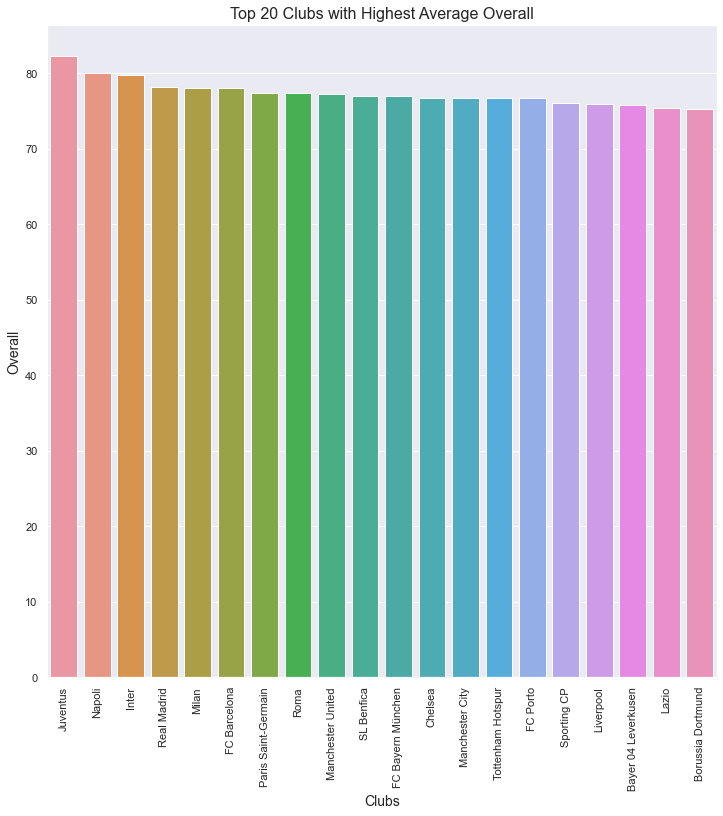

In [67]:
plt.figure(figsize=(12, 12))
plt.xticks(rotation=90)
sns.barplot(x = 'Club', y = 'Overall', data = top20_clubs)
plt.title("Top 20 Clubs with Highest Average Overall", fontsize=16)
plt.xlabel("Clubs", fontsize=14)
plt.ylabel("Overall", fontsize=14)

### Attributes

In [68]:
attributes =['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
           'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
           'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
           'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
           'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
           'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
           'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('Top Player in Each Attribute :')
#print('_________________________\n\n')

i=0
while i < len(attributes):
    print('Best {0} : {1}'.format(attributes[i],df.loc[df[attributes[i]].idxmax()][1]))
    i += 1

Top Player in Each Attribute :
Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


### Correlation HeatMap

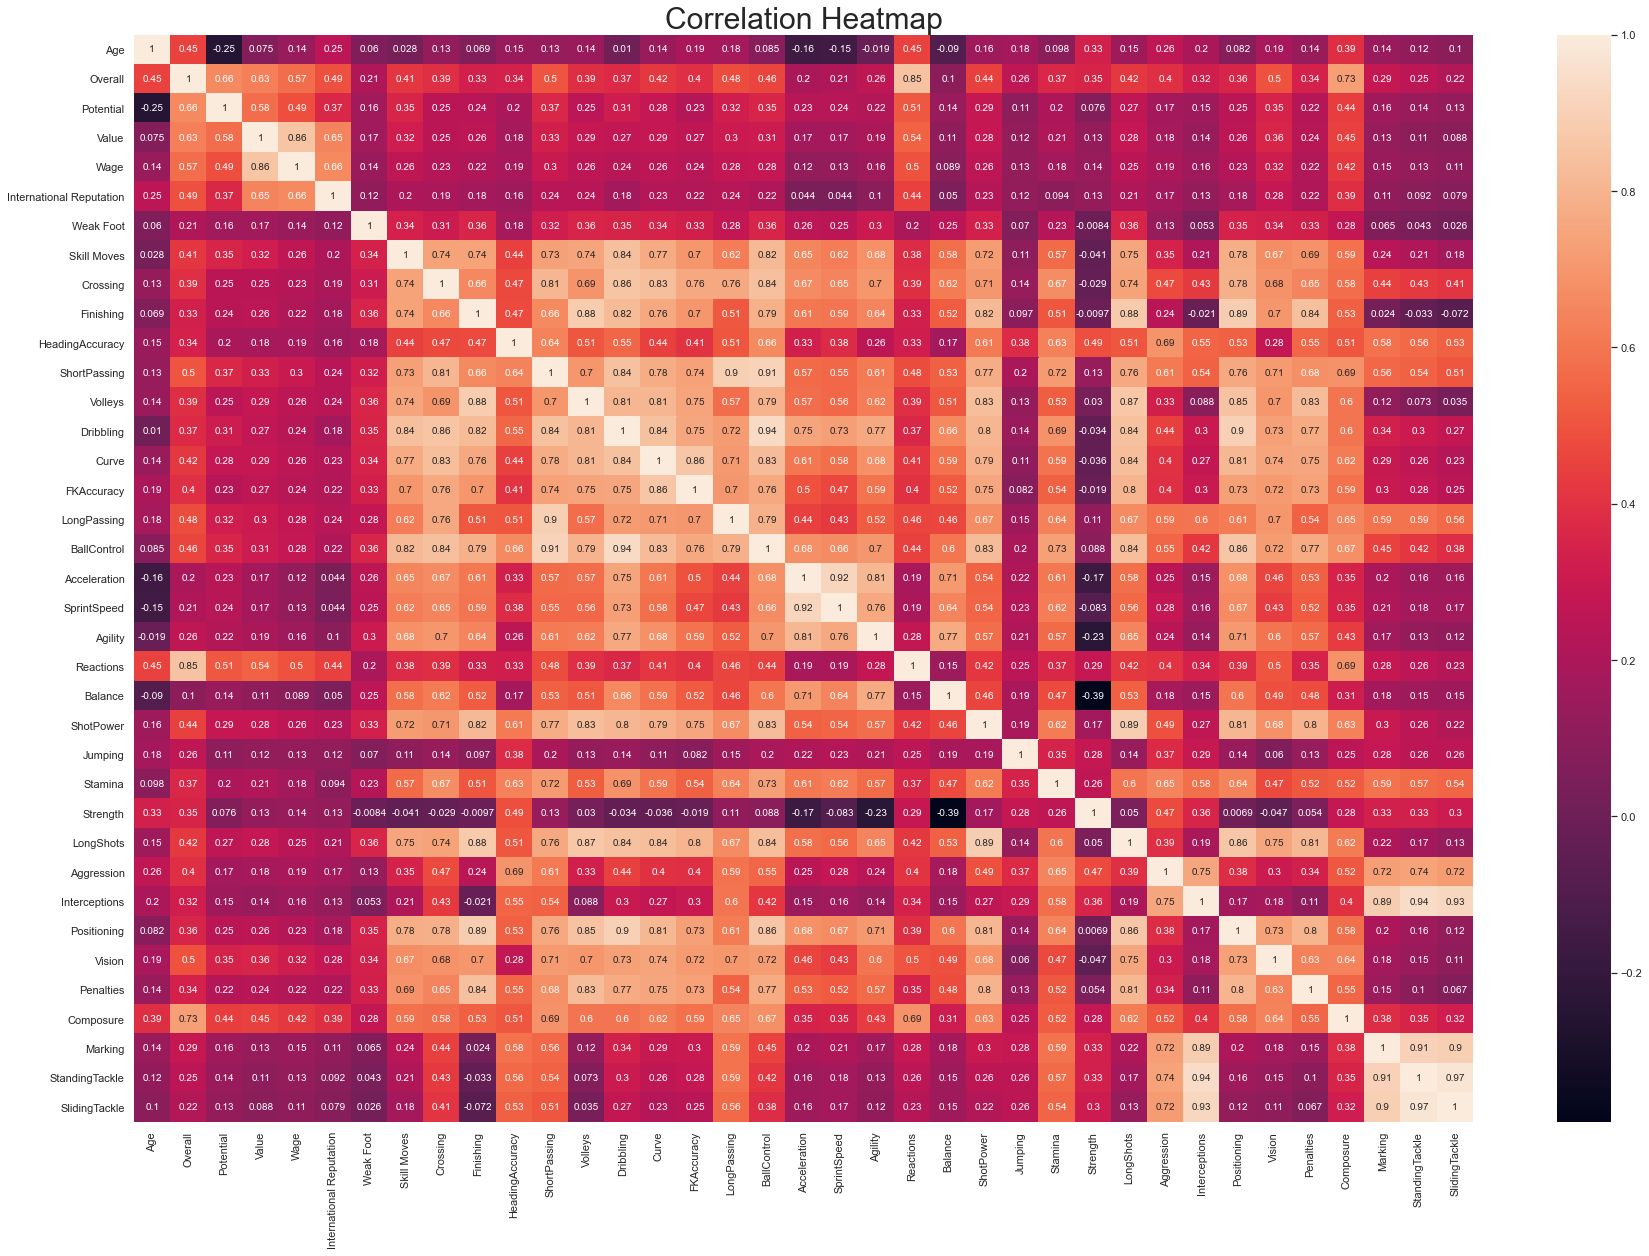

In [69]:
# plotting a correlation heatmap
#adapted from sharmaro shan

corr_heatmap = df.drop(['ID','GKDiving', 'GKHandling','GKKicking','GKPositioning','GKReflexes'],axis=1)

plt.rcParams['figure.figsize'] = (30, 20)
#sns.heatmap(df.corr(), annot = True)
sns.heatmap(corr_heatmap.corr(), annot = True)

plt.title('Correlation Heatmap', fontsize = 30)
plt.show()

In [70]:
#plt.figure(figsize=(10,10))
#sns.heatmap(df.corr()[['Overall']].sort_values('Overall', ascending=False), annot=True, cmap='Reds');

### Top 10 Variables with Highest Correlation to Player's Value

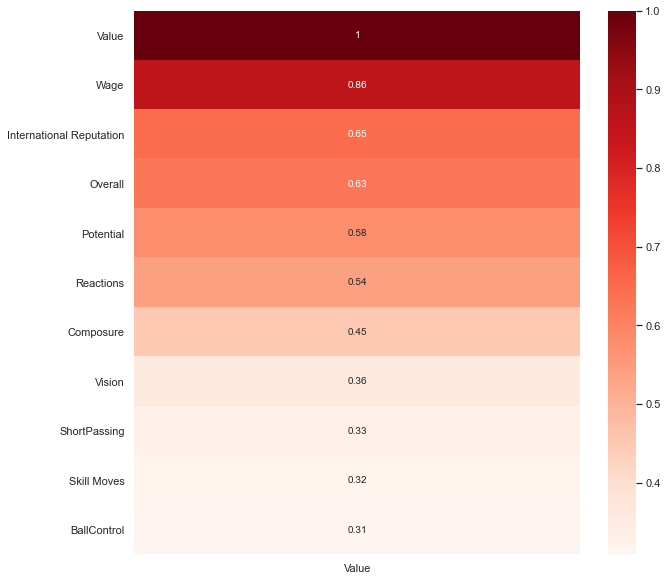

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['Value']].sort_values('Value', ascending=False).head(11), annot=True, cmap='Reds');

In [72]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [74]:
#m = df.drop(['Unnamed: 0','ID','Jersey Number','Contract Valid Until','GKDiving',
       #           'GKHandling','GKKicking','GKPositioning','GKReflexes'],axis=1)


In [ ]:
#BOX
#cat_features = train.select_dtypes(include = 'object').columns
#subplot_boxplot(train, cat_features)

In [ ]:
#input relu
# if output variable binary classification problem use sigmoid
# if output variable multiclassification problem use softmax

In [ ]:
#np.corrcoef(x=df['Age'], y=df['Overall'])

In [76]:
df.to_csv('../data/df_clean.csv', index=False)

### Summary of EDA Insights:
From the data visualizations we can make multiple observations.

(1) Most players are right footed

(2) Players' overall andpotential are usually at their highest when they are around 27-31 years old which is the generally the peak of a footballer's career.

(3) Similarly for earnings, a typical players wage is highest his peak with an exception of the top players in the game which earns way above the average wage despite being above 30.

(4) Sprint Speed and Acceleration have a linear relationship.

(5) TBC

#https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [ ]:
df.head()